## 2. Probability Distributions


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.3 The Gaussian distribution

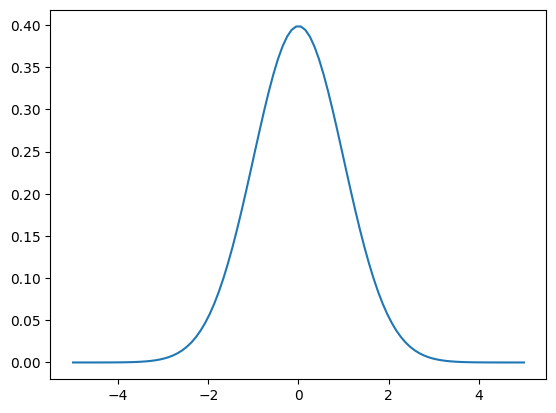

In [2]:
#Model Gaussian Distribution

class Gaussian:

    def __init__(self, mu, var):
        self.mu = mu
        self.var = var

    def pdf(self, x):
        return np.exp(-0.5 * (x - self.mu)**2 / self.var) / np.sqrt(2 * np.pi * self.var)
    
    def draw(self, N):
        return np.random.normal(self.mu, self.var, N)
    
    def plot(self, x_min, x_max):
        x = np.linspace(x_min, x_max, 100)
        y = self.pdf(x)
        plt.plot(x, y)
        plt.show()

Gaussian(0, 1).plot(-5, 5)

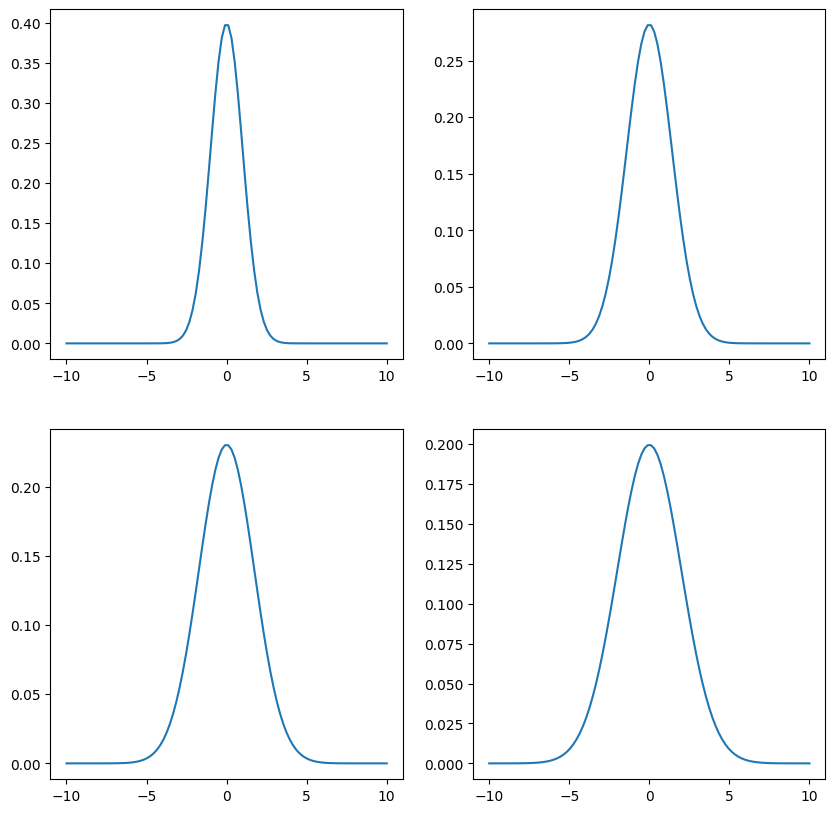

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

x = np.linspace(-10, 10, 100)

for i in range(2):
    for j in range(2):
        axs[i, j].plot(x,Gaussian(0, (i*2)+j+1).pdf(x))

In [ ]:

#Model Mixture of Gaussian Distribution

class MixtureOfGaussian:

    def __init__(self, pi_list, gaussians): # pi_list: list of pi, gaussians: list of Gaussian
        self.pis = pi_list
        self.gaussians = gaussians

    def pdf(self, x):
        return np.sum([pi * gaussian.pdf(x) for pi, gaussian in zip(self.pis, self.gaussians)], axis=0)